In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

In [39]:
sampling_techniques = ['Original', 'SMOTE', 'UNDER','ADASYN']
def plot_all_metrics(metrics, title): 
    fig, ax = plt.subplots(figsize=(10, 8))
    
    bar_width = 0.2
    index = np.arange(len(sampling_techniques)) 
    # order of inhib_metrics: same as sampling techniques list: original, smote , under, adasyn
    # metrics = {'Accuracy': inhib_acc,'Precision': inhib_prec,'Recall': inhib_recall,'Specificity': inhib_spec}
    
    for i, metric_name in enumerate(metrics.keys()):
        metric_values = [metrics[metric_name][j] for j in range(len(sampling_techniques))]
    
        ax.bar(index + (i - 1.5) * bar_width, metric_values, bar_width, label=f'{metric_name}')
    
    ax.set_xlabel('Sampling Technique')
    ax.set_ylabel('Metric Values')
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(sampling_techniques)
    ax.legend(); 
    plt.tight_layout();
    plt.show();

In [40]:
gp_path = '../GP_models/'
gp_perf_path = '../GP_models/model_performance/'
# rf_models_path = '../saved_models/'

In [41]:
# for the MOE feats 

In [42]:
bind_stats = ['nek2_bind_gp_metrics_normfeats.pkl','nek2_bind_gp_metrics_SMOTE.pkl',
                 'nek2_bind_gp_metrics_UNDER.pkl', 'nek2_bind_gp_metrics_ADASYN.pkl']
inhib_stats = ['nek2_inhib_gp_metrics_normfeats.pkl','nek2_inhib_gp_metrics_SMOTE.pkl',
                 'nek2_inhib_gp_metrics_UNDER.pkl', 'nek2_inhib_gp_metrics_ADASYN.pkl']


bind_recall = [] 

bind_acc = [] 
bind_prec = [] 
bind_spec = [] 
inhib_recall = [] 
inhib_acc = [] 
inhib_prec = [] 
inhib_spec = [] 

for bind_pkl, inhib_pkl in zip(bind_stats, inhib_stats):
    with open(gp_path+bind_pkl, 'rb') as f: 
        bind_metrics = pickle.load(f)
        # print(bind_metrics)
        # print(len(bind_metrics))
        # print(f'binding: {bind_metrics[1]}')
        bind_recall.append(bind_metrics[1]['recall']) # 1 is the train results
        # print('\n')
        bind_acc.append(bind_metrics[1]['accuracy'])
        bind_prec.append(bind_metrics[1]['precision'])
        bind_spec.append(bind_metrics[1]['specificity'])
    with open(gp_path+inhib_pkl, 'rb') as f2: 
        inhib_metrics = pickle.load(f2)
        # print(f'inhibition {inhib_metrics[1]}')
        inhib_recall.append(inhib_metrics[1]['recall'])
        inhib_acc.append(inhib_metrics[1]['accuracy'])
        inhib_prec.append(inhib_metrics[1]['precision'])
        inhib_spec.append(inhib_metrics[1]['specificity'])
 

In [43]:
bind_recall, inhib_recall

([0.0, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333],
 [0.17857142857142858, 0.5, 0.7142857142857143, 0.5357142857142857])

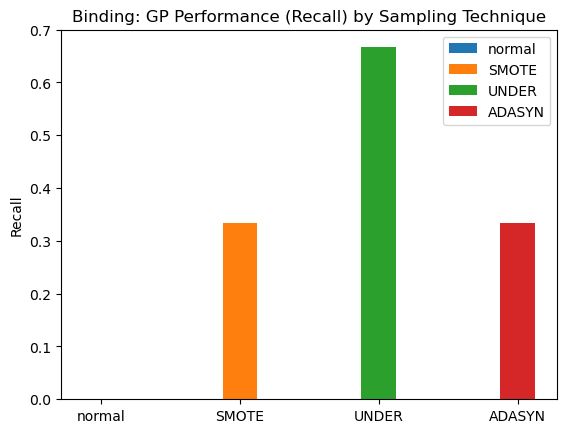

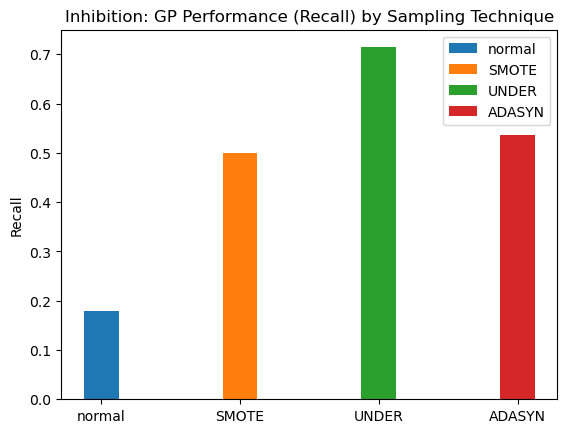

In [44]:
sampling = ['normal', 'SMOTE', 'UNDER', 'ADASYN'] 
x_ = np.arange(len(sampling)) 
fig, ax = plt.subplots()
for i, label in enumerate(sampling):
    plt.bar(x_[i], height=bind_recall[i],width=0.25, label=label)
ax.set_ylabel('Recall')
ax.set_title('Binding: GP Performance (Recall) by Sampling Technique')
ax.set_xticks(x_)
ax.set_xticklabels(sampling)
ax.legend()
plt.show(); 

x_ = np.arange(len(sampling)) 
fig, ax = plt.subplots()
for i, label in enumerate(sampling):
    plt.bar(x_[i], height=inhib_recall[i],width=0.25, label=label)
ax.set_ylabel('Recall')
ax.set_title('Inhibition: GP Performance (Recall) by Sampling Technique')
ax.set_xticks(x_)
ax.set_xticklabels(sampling)
ax.legend()
plt.show(); 


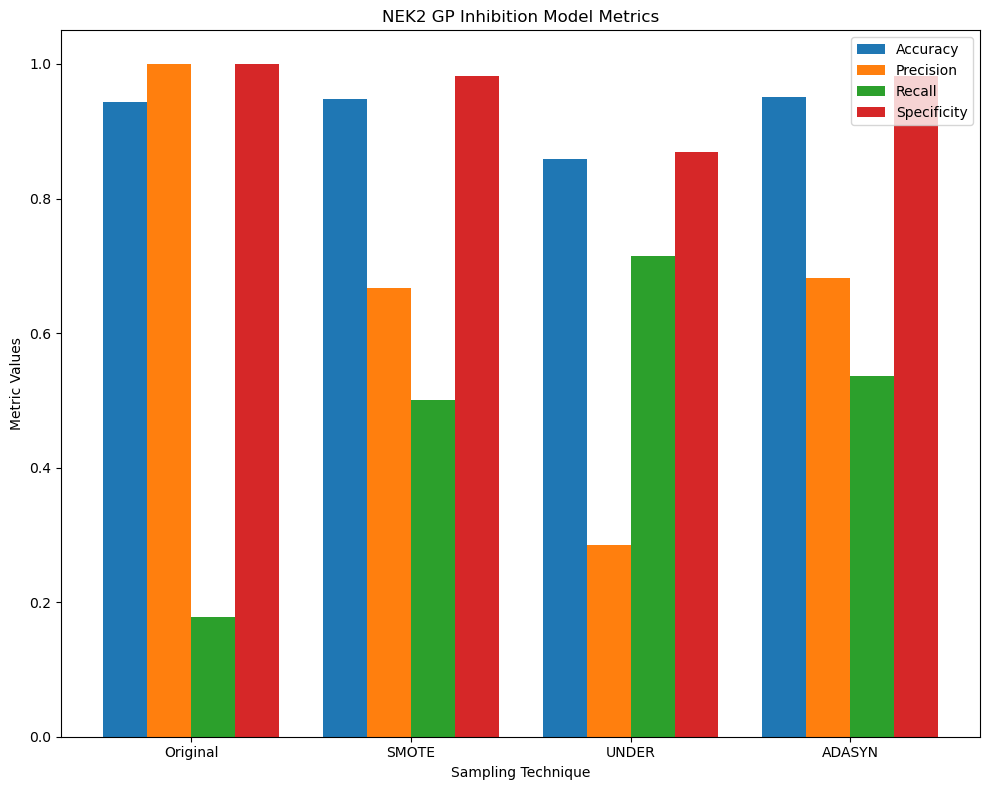

In [45]:
inhib_metrics = {'Accuracy': inhib_acc,'Precision': inhib_prec,'Recall': inhib_recall,'Specificity': inhib_spec}
plot_all_metrics(inhib_metrics, 'NEK2 GP Inhibition Model Metrics')

with open('gp_inhib_metrics.pkl', 'wb') as f: 
    pickle.dump(inhib_metrics, f)

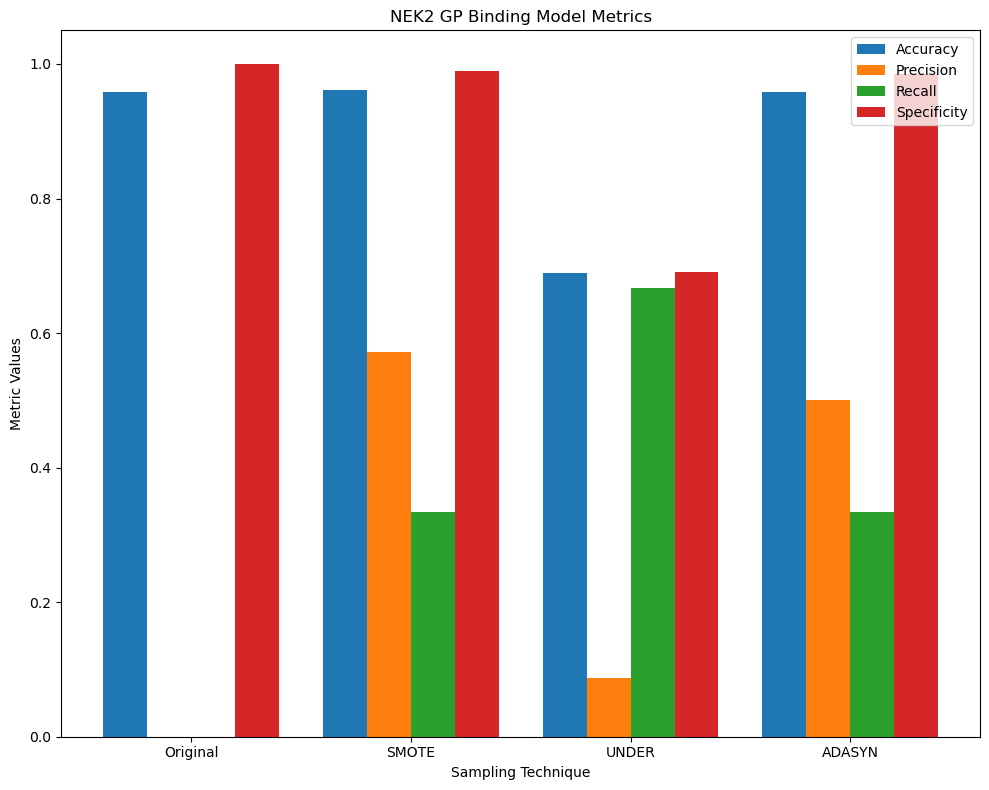

In [46]:
bind_metrics = {'Accuracy': bind_acc,'Precision': bind_prec,'Recall': bind_recall,'Specificity': bind_spec}
plot_all_metrics(bind_metrics, 'NEK2 GP Binding Model Metrics')

with open('gp_bind_metrics.pkl', 'wb') as f: 
    pickle.dump(bind_metrics, f)

In [47]:
morgan2bind_stats = ['nek2_bind_gp_metrics_Morgan2normfeats.pkl','nek2_bind_gp_metrics_Morgan2SMOTE.pkl',
                 'nek2_bind_gp_metrics_Morgan2UNDER.pkl', 'nek2_bind_gp_metrics_Morgan2ADASYN.pkl']
morgan2inhib_stats = ['nek2_inhib_gp_metrics_normfeatstruemfp.pkl','nek2_inhib_gp_metrics_Morgan2SMOTEtruemfp.pkl',
                 'nek2_inhib_gp_metrics_Morgan2UNDERtruemfp.pkl', 'nek2_inhib_gp_metrics_Morgan2ADASYNtruemfp.pkl']


morgan2bind_recall = [] 

morgan2bind_acc = [] 
morgan2bind_prec = [] 
morgan2bind_spec = [] 
morgan2inhib_recall = [] 
morgan2inhib_acc = [] 
morgan2inhib_prec = [] 
morgan2inhib_spec = [] 

for bind_pkl, inhib_pkl in zip(morgan2bind_stats, morgan2inhib_stats):
    with open(gp_path+bind_pkl, 'rb') as f: 
        morgan2bind_metrics = pickle.load(f)
        # print(bind_metrics)
        # print(len(bind_metrics))
        # print(f'binding: {bind_metrics[1]}')
        morgan2bind_recall.append(morgan2bind_metrics[1]['recall']) # 1 is the train results
        # print('\n')
        morgan2bind_acc.append(morgan2bind_metrics[1]['accuracy'])
        morgan2bind_prec.append(morgan2bind_metrics[1]['precision'])
        morgan2bind_spec.append(morgan2bind_metrics[1]['specificity'])
    with open(gp_path+inhib_pkl, 'rb') as f2: 
        morgan2inhib_metrics = pickle.load(f2)
        # print(f'inhibition {inhib_metrics[1]}')
        morgan2inhib_recall.append(morgan2inhib_metrics[1]['recall'])
        morgan2inhib_acc.append(morgan2inhib_metrics[1]['accuracy'])
        morgan2inhib_prec.append(morgan2inhib_metrics[1]['precision'])
        morgan2inhib_spec.append(morgan2inhib_metrics[1]['specificity'])
 

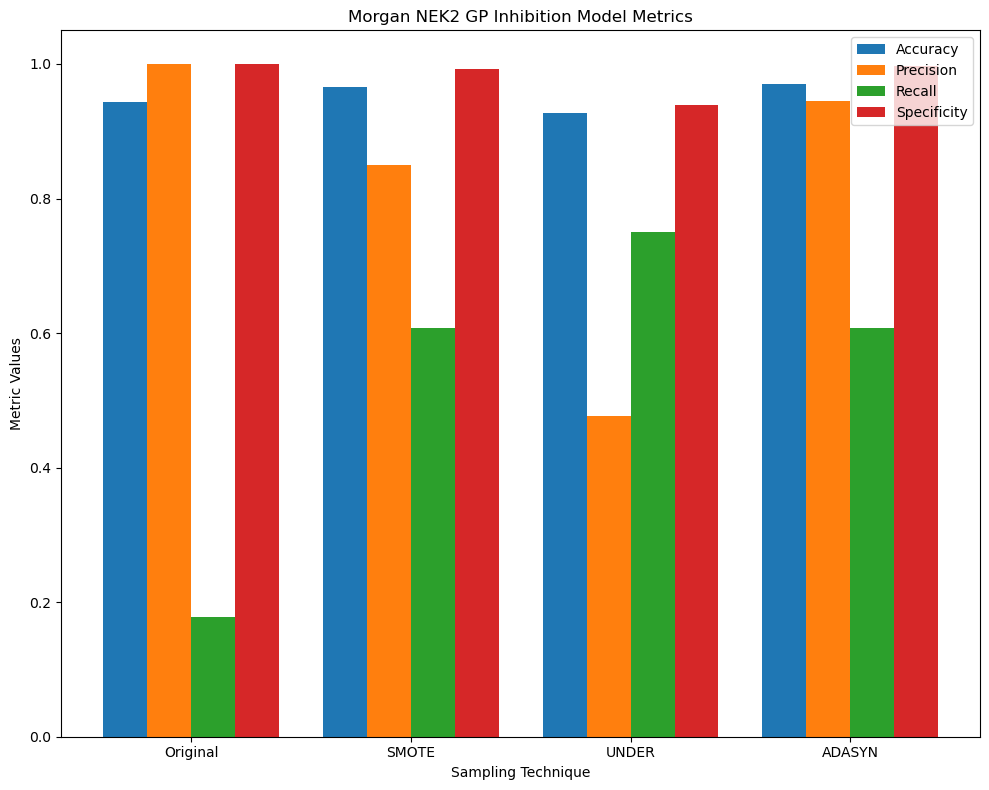

In [48]:
morgan2inhib_metrics = {'Accuracy': morgan2inhib_acc,'Precision': morgan2inhib_prec,'Recall': morgan2inhib_recall,'Specificity': morgan2inhib_spec}
plot_all_metrics(morgan2inhib_metrics, 'Morgan NEK2 GP Inhibition Model Metrics')
with open('gp_inhib_morgan_metricstruemfp.pkl', 'wb') as f: 
    pickle.dump(morgan2inhib_metrics, f)

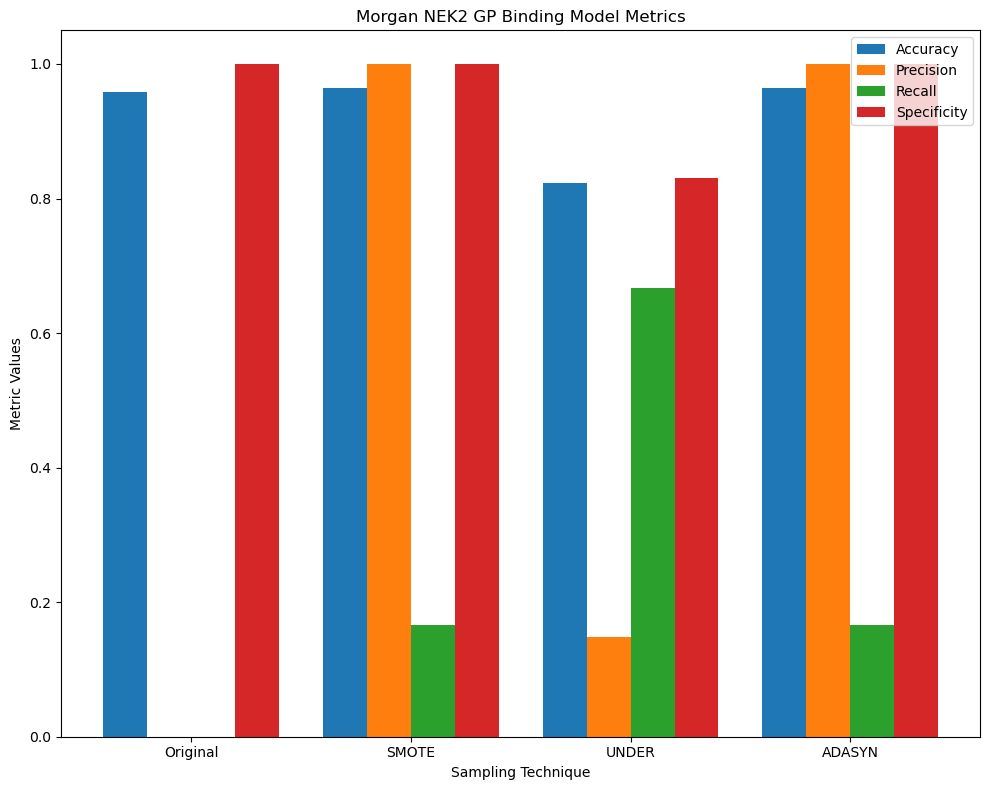

In [49]:
morgan2bind_metrics = {'Accuracy': morgan2bind_acc,'Precision': morgan2bind_prec,'Recall': morgan2bind_recall,'Specificity': morgan2bind_spec}
plot_all_metrics(morgan2bind_metrics, 'Morgan NEK2 GP Binding Model Metrics')
with open('gp_bind_morgan_metricstruemfp.pkl', 'wb') as f: 
    pickle.dump(morgan2bind_metrics, f)

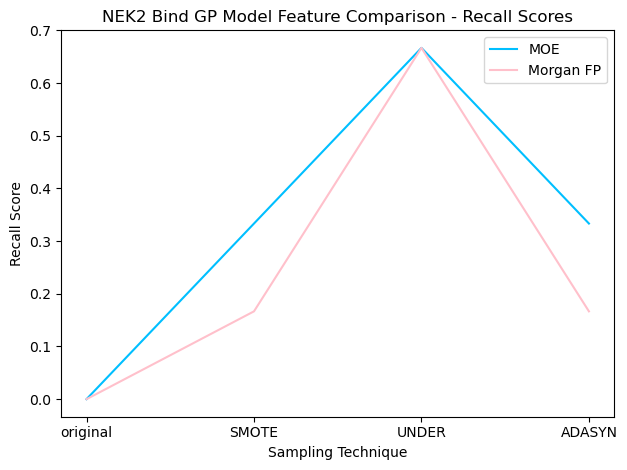

In [50]:

sampling = ['original', 'SMOTE', 'UNDER', 'ADASYN'] 
plt.plot(bind_recall, color='deepskyblue', label='MOE')
plt.plot(morgan2bind_recall, color='pink', label='Morgan FP')
plt.xlabel('Sampling Technique')
plt.ylabel('Recall Score')
plt.title('NEK2 Bind GP Model Feature Comparison - Recall Scores')
plt.xticks(range(len(sampling)), sampling)
plt.tight_layout()
plt.legend()
plt.show()

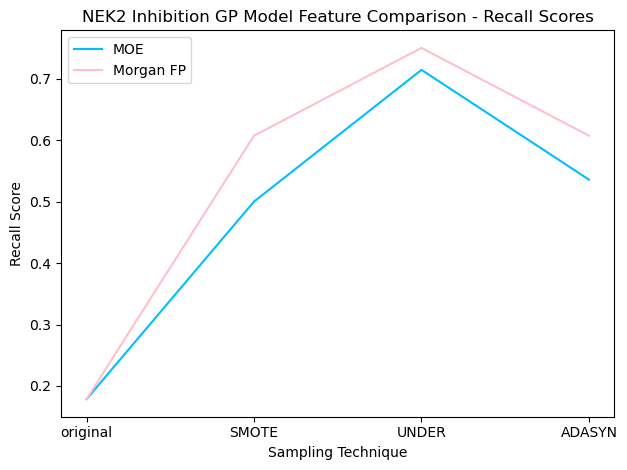

In [51]:

sampling = ['original', 'SMOTE', 'UNDER', 'ADASYN'] 
plt.plot(inhib_recall, color='deepskyblue', label='MOE')
plt.plot(morgan2inhib_recall, color='pink', label='Morgan FP')
plt.xlabel('Sampling Technique')
plt.ylabel('Recall Score')
plt.title('NEK2 Inhibition GP Model Feature Comparison - Recall Scores')
plt.xticks(range(len(sampling)), sampling)
plt.tight_layout()
plt.legend()
plt.show()